# Importing Essentials

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Describing the Dataset

In [2]:
df = pd.read_csv("FraudTrain.csv", index_col=0)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Description of the columns in the Dataset:
+ trans_date_trans_time - Transaction DateTime
+ cc_num - Credit Card Number of Customer
+ merchant - Merchant Name
+ category - Category of Merchant
+ amt - Amount of Transaction
+ first - First Name of Credit Card Holder
+ last - Last Name of Credit Card Holder
+ gender - Gender of Credit Card Holder
+ street - Street Address of Credit Card Holder
+ city - City of Credit Card Holder
+ state - State of Credit Card Holder
+ zip - Zip of Credit Card Holder
+ lat - Latitude Location of Credit Card Holder
+ long - Longitude Location of Credit Card Holder
+ city_pop - Credit Card Holder's City Population
+ job - Job of Credit Card Holder
+ dob - Date of Birth of Credit Card Holder
+ trans_num - Transaction Number
+ unix_time - UNIX Time of transaction
+ merch_lat - Latitude Location of Merchant
+ merch_long - Longitude Location of Merchant
+ is_fraud - Fraud Flag

<h2> There is no null value issues in the dataset </h2>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

# Exploratory Data Analysis

## Time-based Fraud Analysis

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [6]:
df['trans_date'] = df['trans_date_trans_time'].dt.date
df['trans_time'] = df['trans_date_trans_time'].dt.time

In [7]:
fraud_data = df[df['is_fraud'] == 1].copy()

fraud_data['hour'] = fraud_data['trans_date_trans_time'].dt.hour

fraud_counts_by_hour = fraud_data.groupby('hour').size()


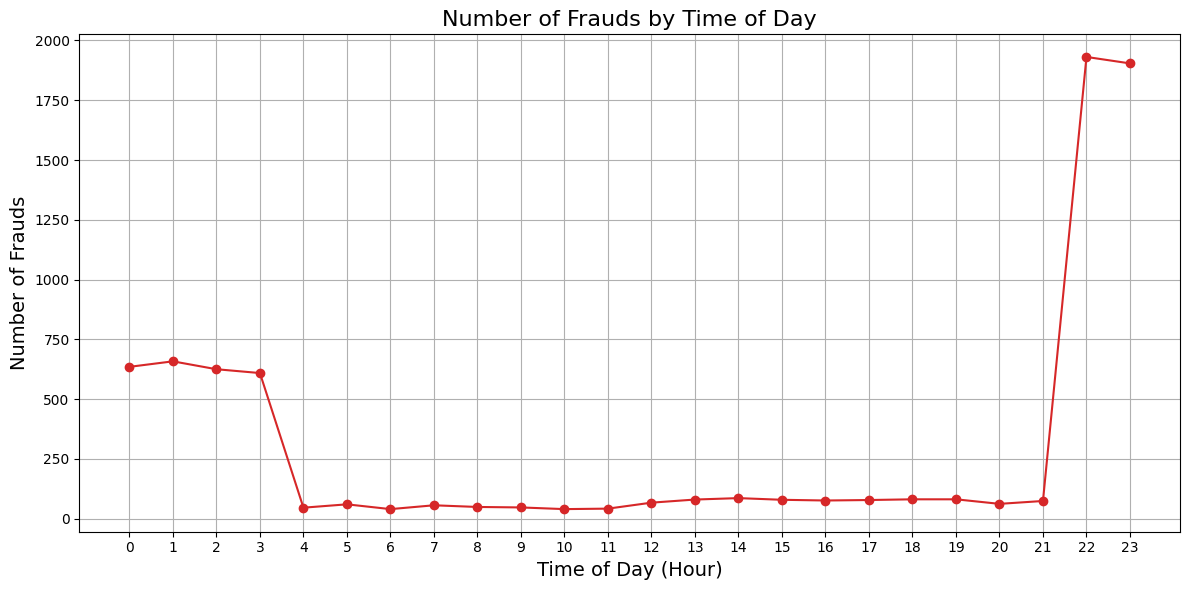

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_counts_by_hour.index, fraud_counts_by_hour.values, marker='o', linestyle='-', color='tab:red')
plt.title('Number of Frauds by Time of Day', fontsize=16)
plt.xlabel('Time of Day (Hour)', fontsize=14)
plt.ylabel('Number of Frauds', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### According to the graph, most frauds take place between 9 PM and 10 PM. Number of frauds is also high between 12 AM to 4 AM, but decreases drastically after that. 

### In the daytime, number of frauds is slightly higher from 1 PM to 5 PM.

## Day-based Fraud Analysis

In [9]:
fraud_data['day_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek

fraud_counts_by_day = fraud_data.groupby('day_of_week').size()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fraud_counts_by_day.index = fraud_counts_by_day.index.map(lambda x: day_names[x])

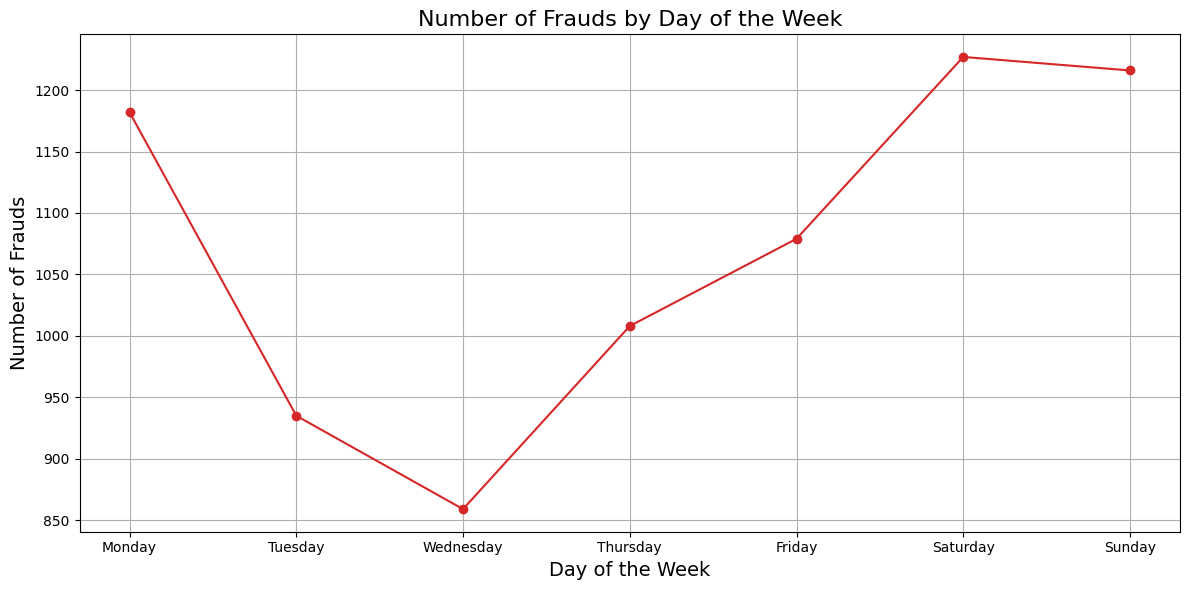

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(fraud_counts_by_day.index, fraud_counts_by_day.values, marker='o', linestyle='-', color='tab:red')
plt.title('Number of Frauds by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Frauds', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### According to the graph, most frauds take place on weekends. 

### As in for the week days, Mondays face the most frauds. 

## Gender-based Fraud Analysis

In [11]:
fraud_counts_by_gender = fraud_data.groupby('gender').size()

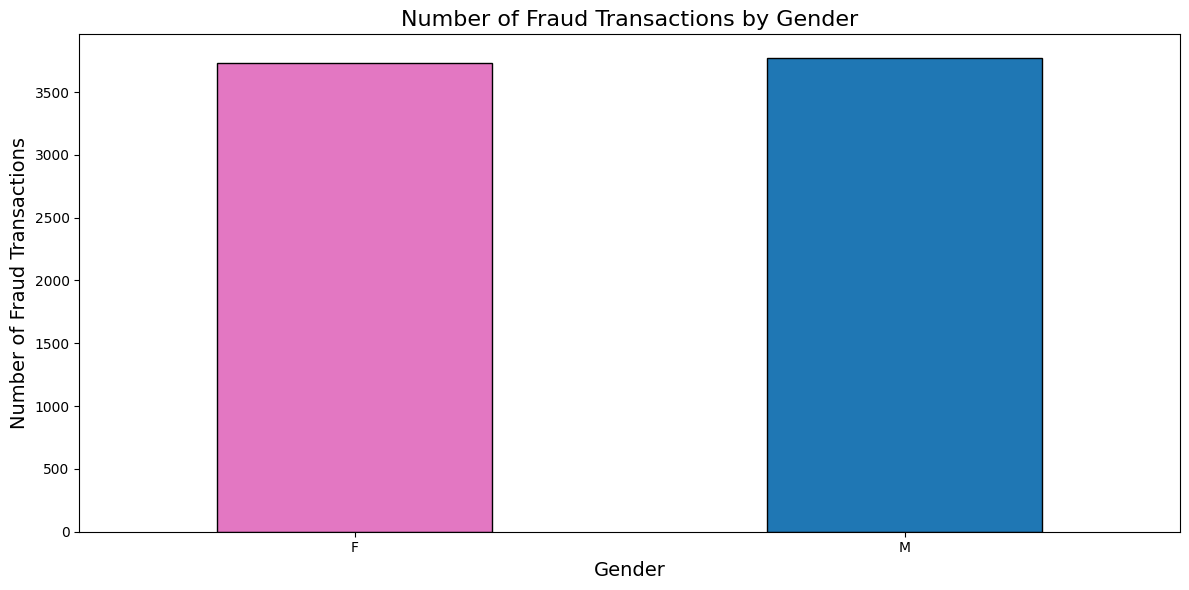

In [12]:
plt.figure(figsize=(12, 6))
fraud_counts_by_gender.plot(kind='bar', color=['tab:pink', 'tab:blue'], edgecolor='black')
plt.title('Number of Fraud Transactions by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Fraud Transactions', fontsize=14)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### There are an equal number of frauds committed by males and females in the dataset

In [13]:
fraud_gender_counts = df.groupby(['gender', 'is_fraud']).size().unstack(fill_value=0)

male_data = fraud_gender_counts.loc['M'] if 'M' in fraud_gender_counts.index else [0, 0]
female_data = fraud_gender_counts.loc['F'] if 'F' in fraud_gender_counts.index else [0, 0]

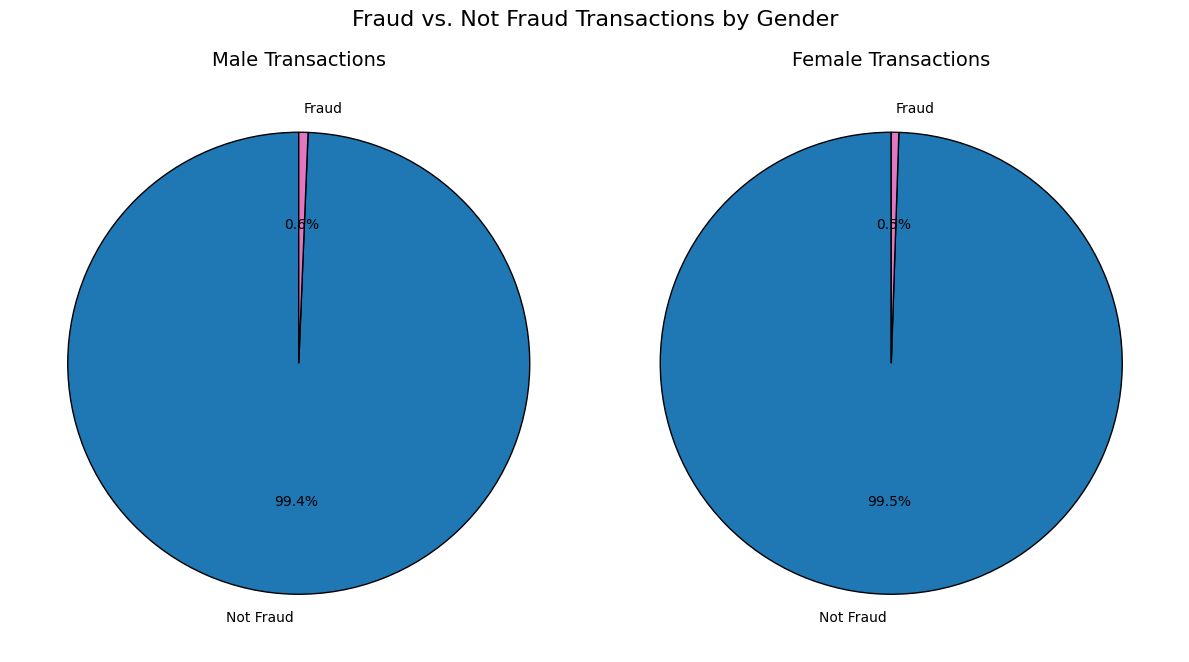

In [14]:
labels = ['Not Fraud', 'Fraud']
colors = ['tab:blue', 'tab:pink']

fig, axes = plt.subplots(1, 2, figsize=(12, 7))

axes[0].pie(male_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[0].set_title('Male Transactions', fontsize=14)

axes[1].pie(female_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Female Transactions', fontsize=14)

plt.suptitle('Fraud vs. Not Fraud Transactions by Gender', fontsize=16)
plt.tight_layout()
plt.show()

### However, there is a slightly higher percentage of male-led frauds compared to female-led

## Age-based Fraud Analysis

In [15]:
df['dob'] = pd.to_datetime(df['dob'])

# The reference date is the date the dataset was generated on
reference_date = pd.Timestamp('2020-12-31')

df['age'] = (reference_date - df['dob']).dt.days // 365

In [16]:
print(df[['dob', 'age']].head())

         dob  age
0 1988-03-09   32
1 1978-06-21   42
2 1962-01-19   58
3 1967-01-12   54
4 1986-03-28   34


In [17]:
age_bins = [12, 19, 64, 150]
age_labels = ['Teens', 'Adults', 'Seniors']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

fraud_data = df[df['is_fraud'] == 1]

fraud_by_age_group = fraud_data['age_group'].value_counts().reindex(age_labels)

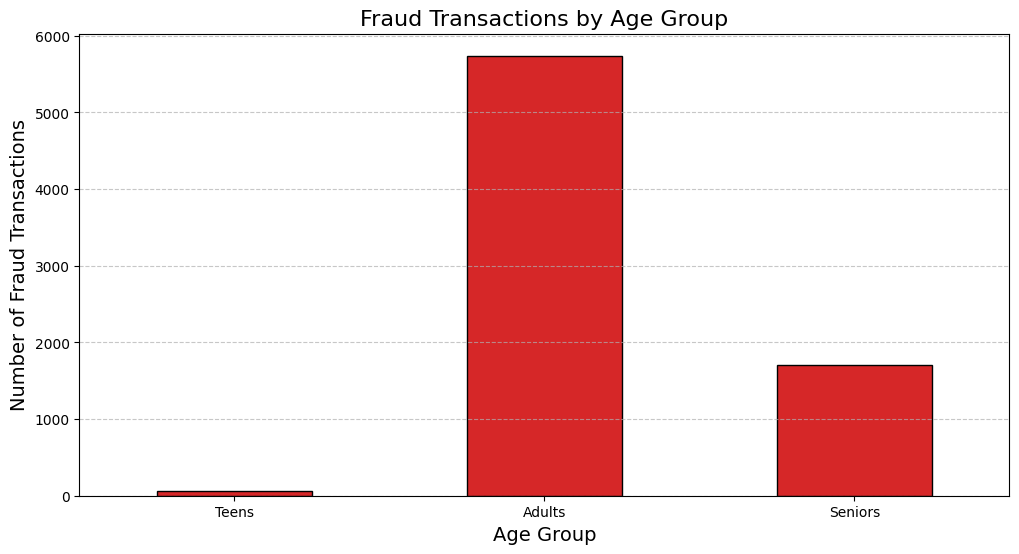

In [18]:
plt.figure(figsize=(12, 6))
fraud_by_age_group.plot(kind='bar', color='tab:red', edgecolor='black')

plt.title('Fraud Transactions by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Fraud Transactions', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### From the graph, we can observe that adults carried out the most fraudulent credit card transactions, followed by seniors, who committed about one-third of the fraudulent transactions of the adults.
### Teens committed very few fraudulent transactions.

In [19]:
age_fraud_distribution = df.groupby(['age_group', 'is_fraud'], observed=False).size().unstack(fill_value=0)


teens_data = age_fraud_distribution.loc['Teens']
adults_data = age_fraud_distribution.loc['Adults']
seniors_data = age_fraud_distribution.loc['Seniors']

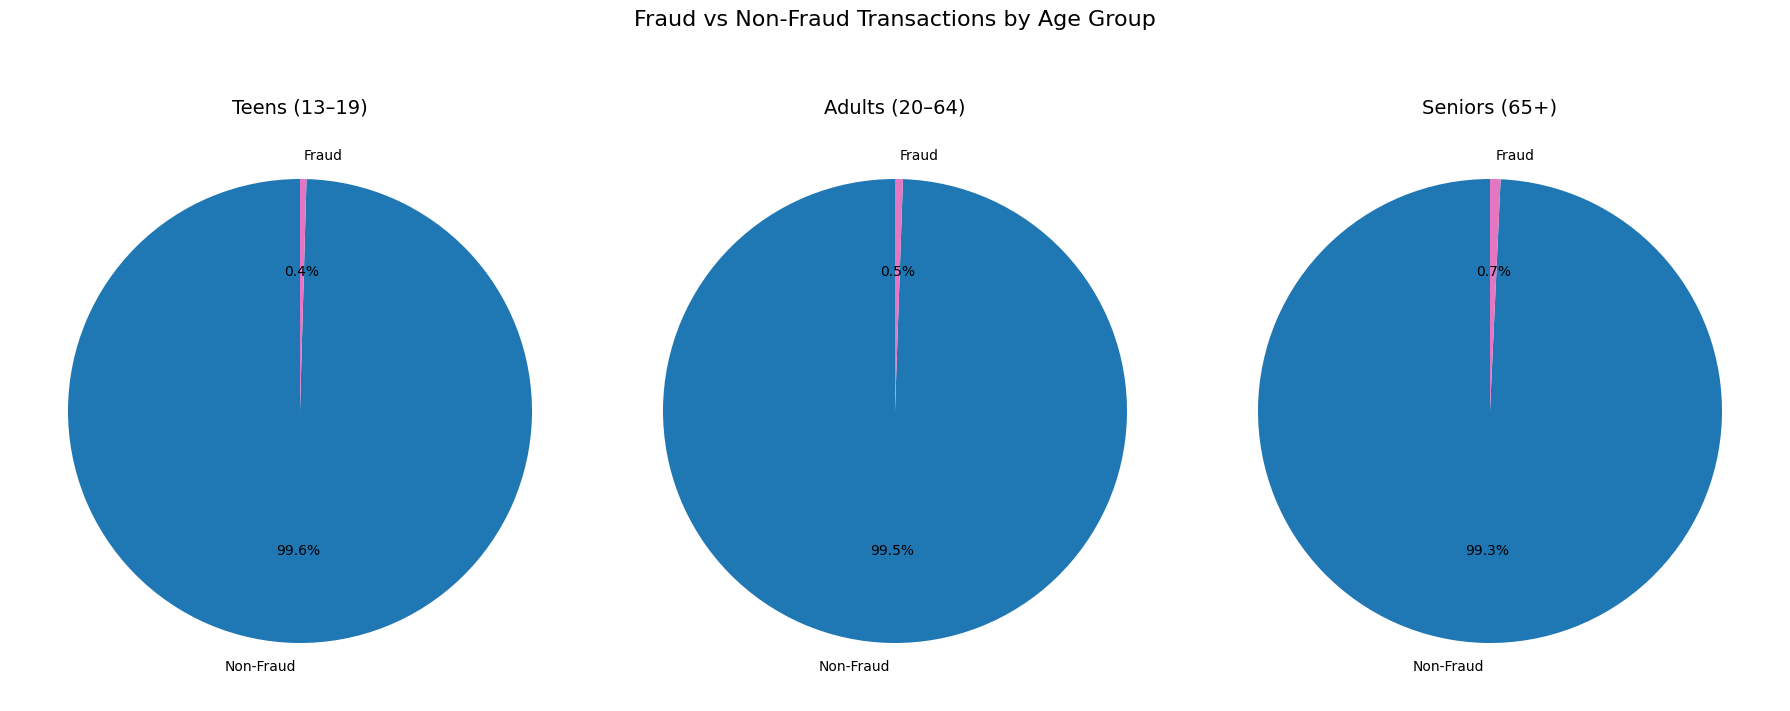

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

axes[0].pie(teens_data, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['tab:blue', 'tab:pink'], startangle=90)
axes[0].set_title('Teens (13–19)', fontsize=14)

axes[1].pie(adults_data, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['tab:blue', 'tab:pink'], startangle=90)
axes[1].set_title('Adults (20–64)', fontsize=14)

axes[2].pie(seniors_data, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['tab:blue', 'tab:pink'], startangle=90)
axes[2].set_title('Seniors (65+)', fontsize=14)

plt.suptitle('Fraud vs Non-Fraud Transactions by Age Group', fontsize=16)
plt.tight_layout()
plt.show()

### However, when we observe the fraud transaction ratio, it is clear that the ratio for all three age groups is similar. 

### There are more transactions by adults in the dataset, and therefore, there are more fraud transaction cases by adults.

## State-based Fraud Analysis

In [21]:
state_fraud_counts = df.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)

fraud_counts = state_fraud_counts[1] 
non_fraud_counts = state_fraud_counts[0]

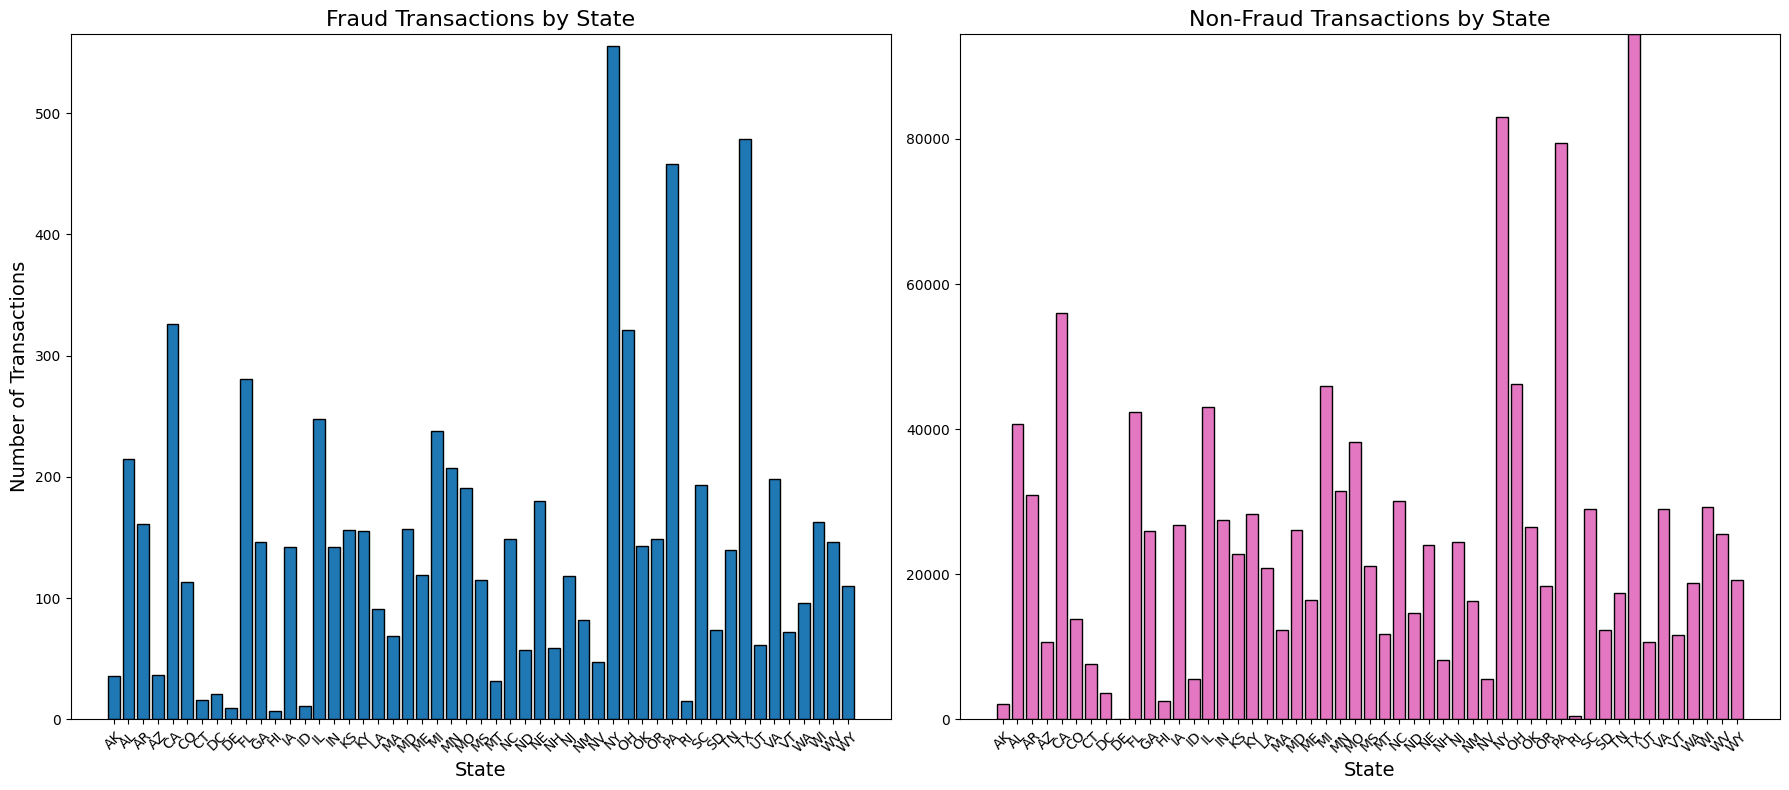

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].bar(fraud_counts.index, fraud_counts.values, color='tab:blue', edgecolor='black')
axes[0].set_title('Fraud Transactions by State', fontsize=16)
axes[0].set_xlabel('State', fontsize=14)
axes[0].set_ylabel('Number of Transactions', fontsize=14)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, fraud_counts.max() + 10) 

axes[1].bar(non_fraud_counts.index, non_fraud_counts.values, color='tab:pink', edgecolor='black')
axes[1].set_title('Non-Fraud Transactions by State', fontsize=16)
axes[1].set_xlabel('State', fontsize=14)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, non_fraud_counts.max() + 10)  

plt.tight_layout()
plt.show()

### According to the left graph, New York has the highest number of fraud transactions, followed by Texas and Pennsylvania consecutively.
### However, we cannot conclude from this data alone, as we can see from the right graph that the highest number of non-fraud transactions are also from New York, Texas, and Pennsylvania.
### In general, these 3 states face the most transactions.

In [23]:
state_fraud_counts = df.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)

state_fraud_counts.columns = ['Non-Fraud Count', 'Fraud Count']

state_fraud_counts['Fraud Ratio'] = state_fraud_counts['Fraud Count'] / (state_fraud_counts['Fraud Count'] + state_fraud_counts['Non-Fraud Count'])

fraud_ratio_table = state_fraud_counts.reset_index()

fraud_ratio_table = fraud_ratio_table.sort_values(by='Fraud Ratio', ascending=False)
fraud_ratio_table.rename(columns={'state': 'State'}, inplace=True)

fraud_ratio_table.head()


,State,Non-Fraud Count,Fraud Count,Fraud Ratio
8,DE,0,9,1.000000
39,RI,535,15,0.027273
0,AK,2084,36,0.016981
33,NV,5560,47,0.008382
5,CO,13767,113,0.008141


### According to the table, Delaware has the highest fraud ratio. 
### However, we can see only 9 transactions in Delaware, of which all 9 are fraud. This is a clear limitation of the dataset. Therefore, we must not consider Delaware data.
### Without taking Delaware into consideration, we can conclude that Rhode Island has the highest fraud transaction ratio, followed by Alaska and Nevada consecutively.

## City-based Fraud Analysis¶

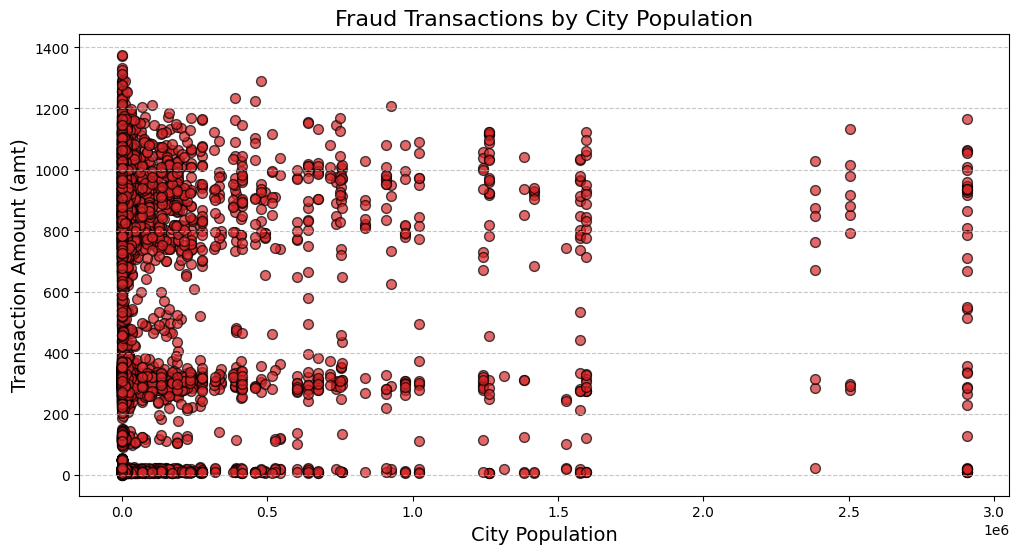

In [24]:
fraud_transactions = df[df['is_fraud'] == 1]

plt.figure(figsize=(12, 6))
plt.scatter(fraud_transactions['city_pop'], fraud_transactions['amt'], color='tab:red', alpha=0.7, edgecolor='black', s=50)

plt.title('Fraud Transactions by City Population', fontsize=16)
plt.xlabel('City Population', fontsize=14)
plt.ylabel('Transaction Amount (amt)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### According to the graph, fraudulent transactions are much more likely in cities with lower populations- although cities with high populations also face fraudulent transactions.
### We can also observe that most fraudulent transaction amounts are above the fraudulent transaction amount. 
### Most of the fraudulent transaction amounts are in the range of 800 to 1000, followed by 200 to 400.